# PJM Hourly Energy Consumption 

Data Description
We will be analyzing hourly energy consumption data provided by PJM Interconnection. PJM Interconnection is a regional transmission organization (RTO) that coordinates distribution of electricity across a region including all or parts of 14 states in the northeastern United States. The data we will be looking at is composed of hourly energy consumption data from Duquesne Light Co. from January 1, 2005 to August 3, 2018. Duquesne Light Co. serves the Pittsburgh, PA, metropolitan area as well as large segments of Allegheny and Beaver Counties. 

In [111]:
# Show PJM Regions
from IPython.display import Image
Image(url= "https://miro.medium.com/max/700/1*V83Sf232oYRBWoEgnbvsVw.png")

Regions joined at different times, so not all have data for all dates. Regions also split (PJM_Load split to East and West)

In [112]:
# Show PJM Regions
from IPython.display import Image
Image(url= "http://slideplayer.com/4238181/14/images/4/PJM+Evolution.jpg")

In [113]:
# Load Modules
import numpy as np 
import pandas as pd
from matplotlib import ticker
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot

Explorring the data


Data Collection

In [114]:
#read file
data=pd.read_csv('archive/DUQ_hourly.csv')

Data Definition


In [115]:
data.shape

(119068, 2)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119068 entries, 0 to 119067
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  119068 non-null  object 
 1   DUQ_MW    119068 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.8+ MB


In [117]:
print(data.head(10))

              Datetime  DUQ_MW
0  2005-12-31 01:00:00  1458.0
1  2005-12-31 02:00:00  1377.0
2  2005-12-31 03:00:00  1351.0
3  2005-12-31 04:00:00  1336.0
4  2005-12-31 05:00:00  1356.0
5  2005-12-31 06:00:00  1372.0
6  2005-12-31 07:00:00  1402.0
7  2005-12-31 08:00:00  1425.0
8  2005-12-31 09:00:00  1502.0
9  2005-12-31 10:00:00  1556.0


Transposing the data To see the energy consumed in each date time

In [118]:
print(data.columns)

Index(['Datetime', 'DUQ_MW'], dtype='object')


In [119]:
data.describe

<bound method NDFrame.describe of                    Datetime  DUQ_MW
0       2005-12-31 01:00:00  1458.0
1       2005-12-31 02:00:00  1377.0
2       2005-12-31 03:00:00  1351.0
3       2005-12-31 04:00:00  1336.0
4       2005-12-31 05:00:00  1356.0
...                     ...     ...
119063  2018-01-01 20:00:00  1962.0
119064  2018-01-01 21:00:00  1940.0
119065  2018-01-01 22:00:00  1891.0
119066  2018-01-01 23:00:00  1820.0
119067  2018-01-02 00:00:00  1721.0

[119068 rows x 2 columns]>

In [120]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,119058,119059,119060,119061,119062,119063,119064,119065,119066,119067
Datetime,2005-12-31 01:00:00,2005-12-31 02:00:00,2005-12-31 03:00:00,2005-12-31 04:00:00,2005-12-31 05:00:00,2005-12-31 06:00:00,2005-12-31 07:00:00,2005-12-31 08:00:00,2005-12-31 09:00:00,2005-12-31 10:00:00,...,2018-01-01 15:00:00,2018-01-01 16:00:00,2018-01-01 17:00:00,2018-01-01 18:00:00,2018-01-01 19:00:00,2018-01-01 20:00:00,2018-01-01 21:00:00,2018-01-01 22:00:00,2018-01-01 23:00:00,2018-01-02 00:00:00
DUQ_MW,1458.0,1377.0,1351.0,1336.0,1356.0,1372.0,1402.0,1425.0,1502.0,1556.0,...,1811.0,1828.0,1858.0,1960.0,1968.0,1962.0,1940.0,1891.0,1820.0,1721.0


In [121]:
data['Datetime'].value_counts( sort=False)

2005-12-31 01:00:00    1
2005-12-31 02:00:00    1
2005-12-31 03:00:00    1
2005-12-31 04:00:00    1
2005-12-31 05:00:00    1
                      ..
2018-01-01 20:00:00    1
2018-01-01 21:00:00    1
2018-01-01 22:00:00    1
2018-01-01 23:00:00    1
2018-01-02 00:00:00    1
Name: Datetime, Length: 119064, dtype: int64

In [122]:
data['DUQ_MW'].value_counts(bins=10, sort=False)

(1011.9590000000001, 1218.0]     4785
(1218.0, 1422.0]                21875
(1422.0, 1626.0]                32388
(1626.0, 1830.0]                31563
(1830.0, 2034.0]                16341
(2034.0, 2238.0]                 6117
(2238.0, 2442.0]                 3470
(2442.0, 2646.0]                 1744
(2646.0, 2850.0]                  667
(2850.0, 3054.0]                  118
Name: DUQ_MW, dtype: int64

In [123]:
uniq_date=data["Datetime"].value_counts()
print(uniq_date)

2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2017-11-05 02:00:00    2
2014-12-11 22:00:00    1
                      ..
2009-06-22 21:00:00    1
2009-06-22 20:00:00    1
2009-06-22 19:00:00    1
2009-06-22 18:00:00    1
2018-01-02 00:00:00    1
Name: Datetime, Length: 119064, dtype: int64


In [124]:
uniq_mw=data["DUQ_MW"].value_counts()
print(uniq_mw)

1613.0    205
1670.0    204
1677.0    202
1580.0    201
1645.0    200
         ... 
2889.0      1
2769.0      1
1052.0      1
2772.0      1
1050.0      1
Name: DUQ_MW, Length: 1882, dtype: int64


Date has more unique values then the energy consumption 

In [125]:
# Calculating mean,median,mode and standard debiation of daily energy consumption in megawatts (MW)
m=data['DUQ_MW'].mean()
print(m)

1658.8202959653308


In [126]:
M=data['DUQ_MW'].median()
print(m)

1658.8202959653308


In [127]:
Mode=data['DUQ_MW'].mode()
print(Mode)

0    1613.0
Name: DUQ_MW, dtype: float64


In [128]:
std=data['DUQ_MW'].std()
print(std)

301.74063957777213


Dataset has same mean and median of 1658.82megawatts (MW) having mode of  1613 megawatts (MW) and 301.74 as standard deviation

In [129]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


## Data Cleaning

In [130]:
# Checking for the missing value in dataset
data.isna()

,Datetime,DUQ_MW
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
119063,False,False
119064,False,False
119065,False,False
119066,False,False


In [131]:
data.isnull()

,Datetime,DUQ_MW
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
119063,False,False
119064,False,False
119065,False,False
119066,False,False


In [132]:
#Number Of Missing Values By Column

In [133]:
data.isna().sum()

Datetime    0
DUQ_MW      0
dtype: int64

Checking for duplicate value and droping the duplicate dates

In [134]:
data['Datetime'].duplicated().sum()

4

In [135]:
data['DUQ_MW'].duplicated().sum()

117186

In [136]:
# printing duplicate dates
dup_dates=data[data['Datetime'].duplicated()]
print(dup_dates)

                   Datetime  DUQ_MW
80287   2014-11-02 02:00:00  1240.0
89071   2015-11-01 02:00:00  1138.0
97711   2016-11-06 02:00:00  1107.0
106519  2017-11-05 02:00:00  1105.0


In [137]:
# droping duplicate dates since energy used can be same in two households
data=data.drop_duplicates(subset=['Datetime'])

#checking the number of duplicate value
data['Datetime'].duplicated().sum()

0

## Graphical representation

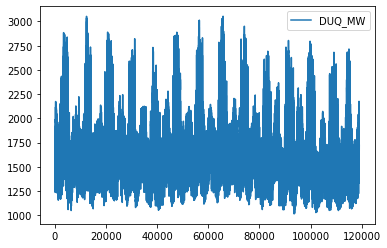

In [138]:
# ploting the dataset
data.plot()
plt.show()

In [139]:
# scalling the dataset
import sklearn.preprocessing
scaler = sklearn.preprocessing.MinMaxScaler()
data_norm = scaler.fit_transform(data['DUQ_MW'].values.reshape(-1,1))
data_norm.shape

(119064, 1)

# Exploratory Data Analysis

### summary stats table for dataframe

In [140]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DUQ_MW,119064.0,1658.837474,301.730984,1014.0,1444.0,1630.0,1819.0,3054.0


## histograms for each variable in df


In [141]:
print(data.dtypes)

Datetime     object
DUQ_MW      float64
dtype: object


In [142]:
# function "datetime" transforma the columns "datetime" from object (string) to datetime.
data['Datetime'] = pd.to_datetime( data['Datetime'] )

C:\Users\hp\AppData\Local\Temp\ipykernel_15588\866477591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Datetime'] = pd.to_datetime( data['Datetime'] )


In [143]:
data.dtypes

Datetime    datetime64[ns]
DUQ_MW             float64
dtype: object

In [144]:
# divide into numerical and categorical columns, as they will be treated with different techniques.
num_attributes = data.select_dtypes( include=['float64'] )
cat_attributes = data.select_dtypes( exclude=['float64', 'datetime64[ns]'] )

In [145]:
num_attributes.sample()

,DUQ_MW
50509,1376.0


In [146]:
cat_attributes.sample()

""
49559


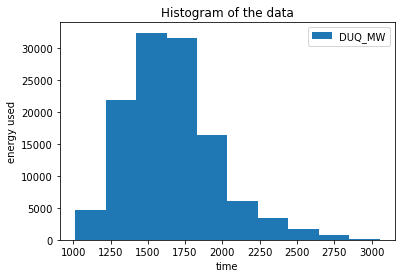

In [147]:

ax=data.plot(kind='hist',bins=10)
ax.set_xlabel('time')
ax.set_ylabel('energy used')
ax.set_title('Histogram of the data')
plt.show()


### create a boxplot for every column in df


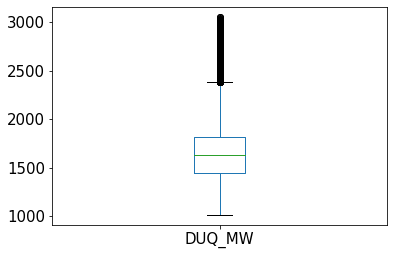

In [148]:
boxplot = data.boxplot(grid=False,fontsize=15)

### PLoting the line graph to see the changes in ecetric consuption

#### changing the index to date time

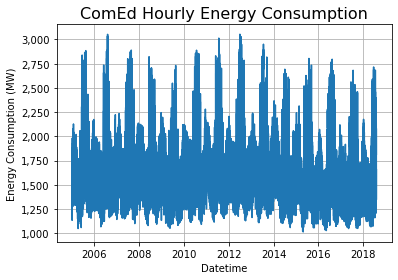

In [149]:
ax = sns.lineplot(data=data, x='Datetime', y='DUQ_MW')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')
plt.title('ComEd Hourly Energy Consumption', fontsize=16)
plt.grid(True)
plt.show()

In [150]:
# Get quarters from the datetime
data['QUARTER'] = data['Datetime'].dt.quarter
data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_15588\2875985085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['QUARTER'] = data['Datetime'].dt.quarter


,Datetime,DUQ_MW,QUARTER
0,2005-12-31 01:00:00,1458.0,4
1,2005-12-31 02:00:00,1377.0,4
2,2005-12-31 03:00:00,1351.0,4
3,2005-12-31 04:00:00,1336.0,4
4,2005-12-31 05:00:00,1356.0,4


In [151]:
# Convert dataframe to average monthly format
data = data.resample('M', on='Datetime').mean().rename(columns={'DUQ_MW':'MONTHLY_AVG'})
data['QUARTER'] = data['QUARTER'].astype(int)
data.head()

,MONTHLY_AVG,QUARTER
Datetime,,
2005-01-31,1685.872140,1
2005-02-28,1656.662202,1
2005-03-31,1633.283602,1
2005-04-30,1443.560501,2
2005-05-31,1487.625000,2


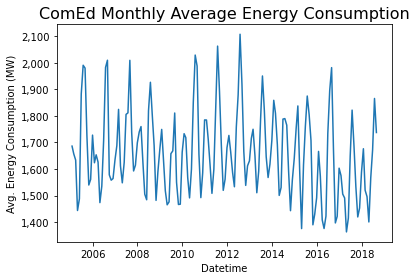

In [152]:

ax = sns.lineplot(data=data, x='Datetime', y='MONTHLY_AVG')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Datetime')
plt.ylabel('Avg. Energy Consumption (MW)')
plt.title('ComEd Monthly Average Energy Consumption', fontsize=16)
plt.show()

### Autocorrelation Plot

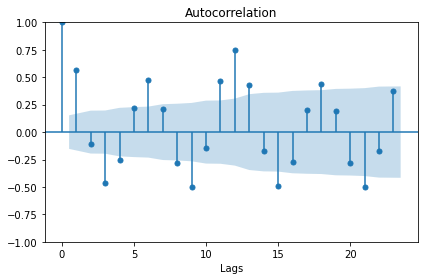

In [153]:
# Select a multiple of the seasonal frequency for the number of lags
plot_acf(data['MONTHLY_AVG'])
plt.xlabel('Lags')
plt.tight_layout()
plt.show()